https://www.overleaf.com/project/6633d3e625ddb8cca763490d

In [3]:
# Package for downloading files from Google Drive
# import gdown

# Download evaluation benchmarks
agr_name = "distractor_agreement_relational_noun.jsonl"
agr_url = "https://drive.google.com/file/d/1ddU-q9hYqKQejPoR6DKn5aVm8SUh1a1H/view?usp=sharing"
gdown.download(url=agr_url, output=agr_name, fuzzy=True)

anim_name = "animate_subject_passive.jsonl"
anim_url = "https://drive.google.com/file/d/1RElijgxi8E2w6A_7sa5kyzD_EL8BunaG/view?usp=sharing"
gdown.download(url=anim_url, output=anim_name, fuzzy=True)

NameError: name 'gdown' is not defined

In [5]:
import json
from minicons import scorer
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from transformers import AutoModelForCausalLM, AutoTokenizer

In [6]:
# Load a GPT-2 language model
gpt2 = AutoModelForCausalLM.from_pretrained('gpt2', return_dict=True)
gpt2_tokenizer = AutoTokenizer.from_pretrained('gpt2', use_fast=True)
model = scorer.IncrementalLMScorer(gpt2, tokenizer=gpt2_tokenizer, device='cuda')

c:\Users\jindd\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\jindd\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\jindd\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\jindd\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible.

2.2495574951171875
9.397422790527344
7.066825866699219


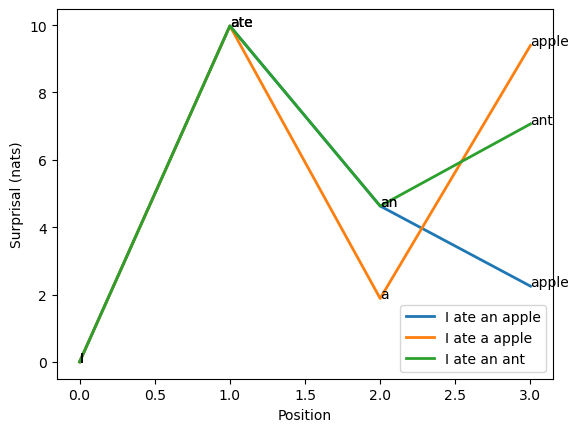

In [7]:
# Compute surprisal (cross-entropy) values
pre = ""
sentences = [
              pre+"I ate an apple",
              pre+"I ate a apple",
              pre+"I ate an ant",
             ]
surprisals = model.token_score(sentences, surprisal = True)

# Plot surprisal values
fig, ax = plt.subplots()

for s in surprisals:
    tokens, scores = zip(*s)
    positions = range(len(scores))
    sent = ' '.join(tokens)
    ax.plot(positions, scores, linewidth=2.0, label = sent)
    for i, txt in enumerate(tokens):
        ax.annotate(txt, (i, scores[i]))
    print( scores[-1] )

plt.xlabel("Position")
plt.ylabel("Surprisal (nats)")

plt.legend()
plt.show()